# Simple Linear Regression(Salary Data)

In [1]:
# importing the requred libraries

import pandas as pd
import numpy as np
import seaborn as sns
from warnings import filterwarnings
import statsmodels.formula.api as smf
filterwarnings('ignore')#ignoring the error

In [2]:
#reading the salary data using pandas

df=pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
#checking there data types and finding whether they have null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
#lets Describe the data's

df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
#finding whether datasets contains null values
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

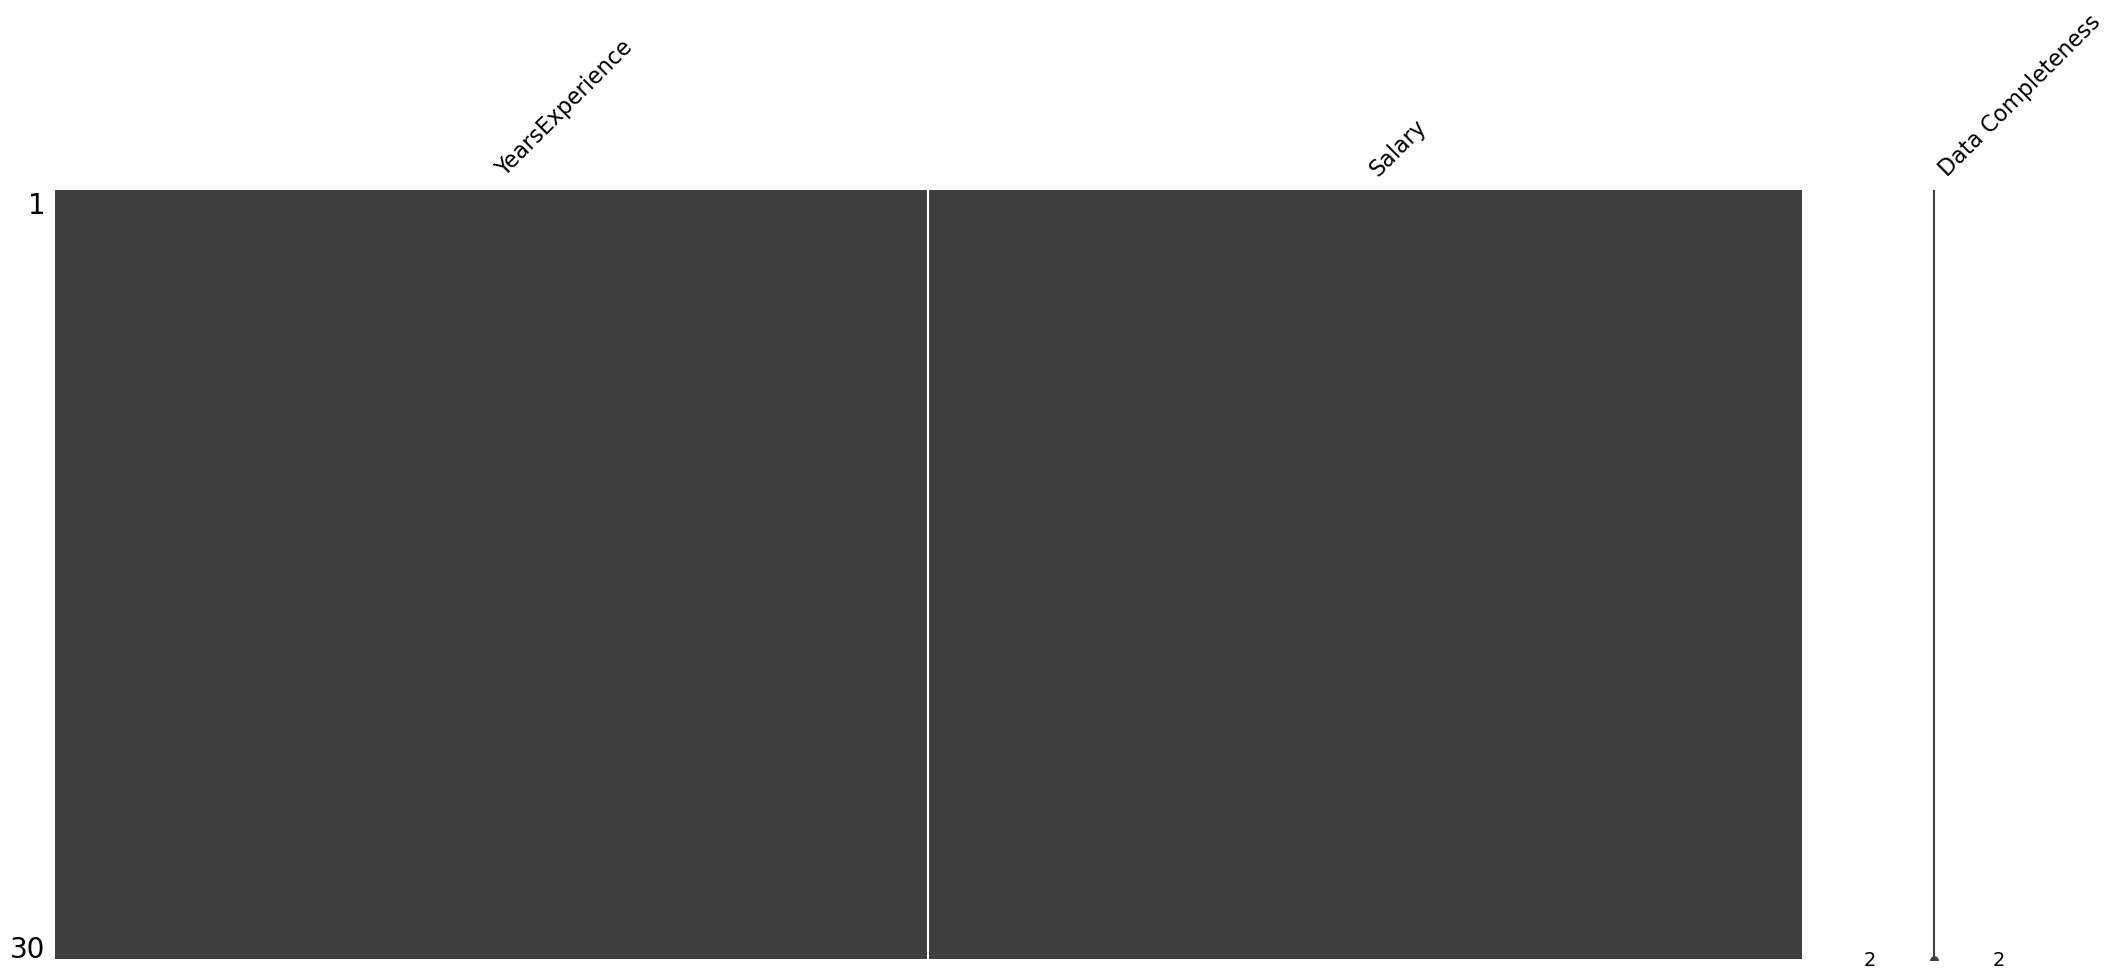

In [5]:
#checking whether null values are present in the datasets
import missingno as msno

msno.matrix(df, labels=True, sort="descending");

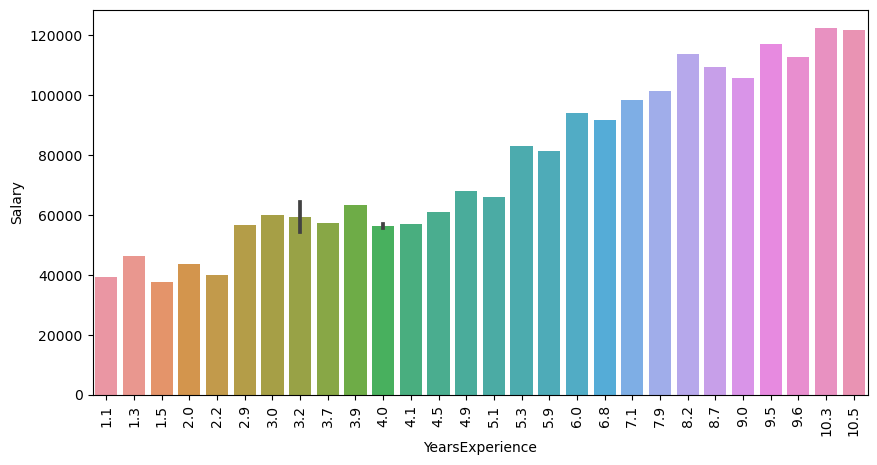

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.barplot(x=df['YearsExperience'],y=df['Salary'])
plt.xticks(rotation=90);

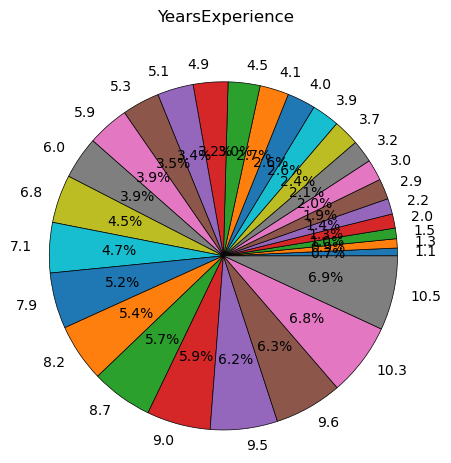

In [50]:
wp = { 'linewidth' : 0.5, 'edgecolor' : "black" }
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)
season=df['YearsExperience'].unique()
label=df['YearsExperience'].unique()
plt.suptitle('YearsExperience')
plt.pie(season,autopct = lambda pct: func(pct, df['YearsExperience']),labels=label,wedgeprops = wp,radius=1.5);
plt.tight_layout()

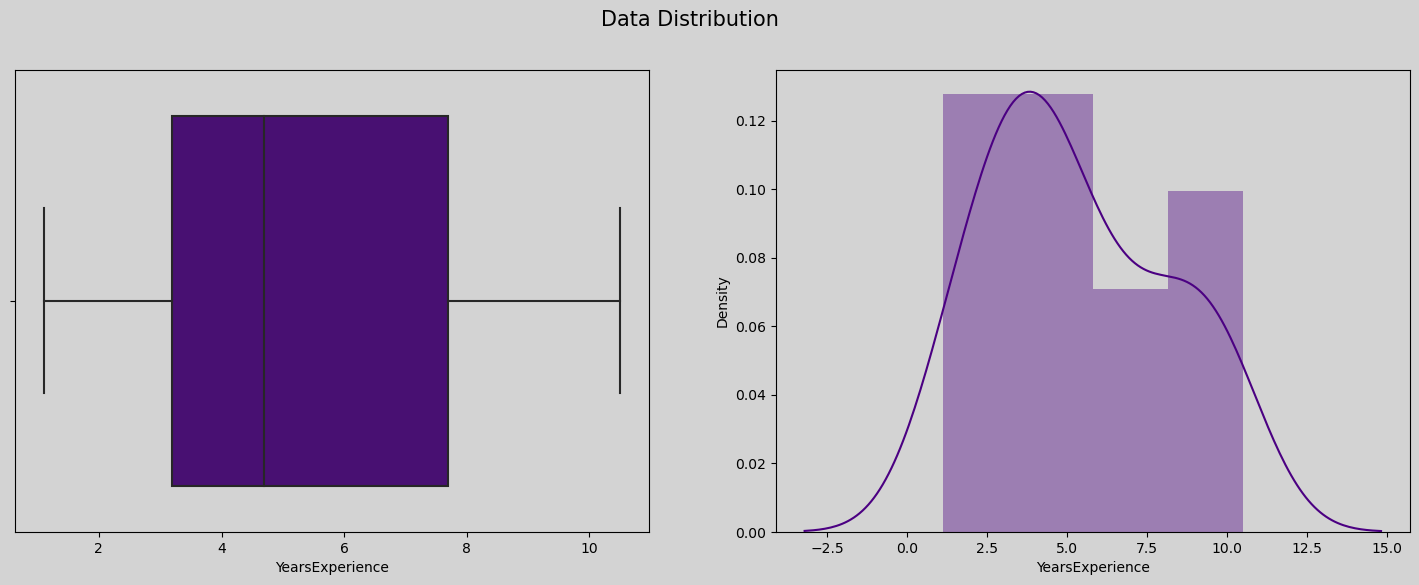

In [36]:
#finding outlier by using box plots

f, axes = plt.subplots(1, 2,figsize=(18, 6),facecolor='lightgrey')
axes[0].set_facecolor('lightgrey')
axes[1].set_facecolor('lightgrey')
plt.suptitle('Data Distribution',fontsize=15)
sns.boxplot(df['YearsExperience'],color='indigo',ax=axes[0]);
sns.distplot(df['YearsExperience'],color='indigo',ax=axes[1]);

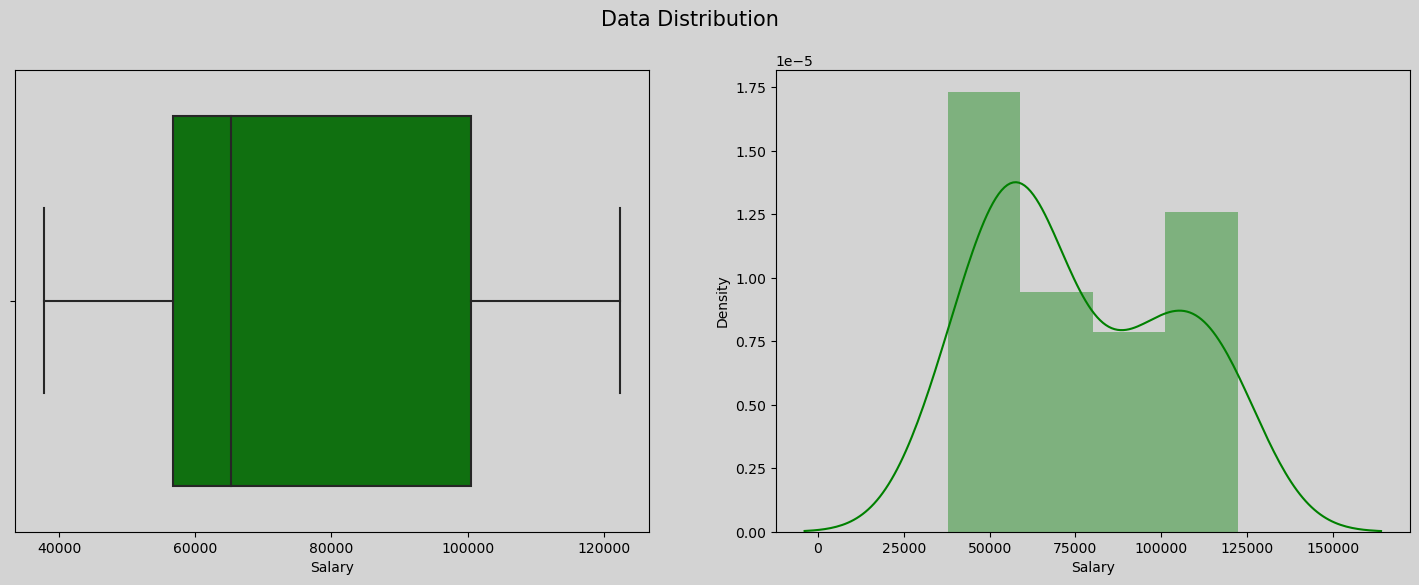

In [37]:
f, axes = plt.subplots(1, 2,figsize=(18, 6),facecolor='lightgrey')
axes[0].set_facecolor('lightgrey')
axes[1].set_facecolor('lightgrey')
plt.suptitle('Data Distribution',fontsize=15)
sns.boxplot(df['Salary'],color='green',ax=axes[0]);
sns.distplot(df['Salary'],color='green',ax=axes[1]);

In [38]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [39]:
#creating the model

model = smf.ols('Salary~YearsExperience',df).fit()

In [40]:
print('accuracy of the model :',model.rsquared_adj)

accuracy of the model : 0.9554194021486339


In [41]:
print('pvalues of the model',model.pvalues,'\n','\n','tvalues of the model',model.tvalues)


pvalues of the model Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64 
 
 tvalues of the model Intercept          11.346940
YearsExperience    24.950094
dtype: float64


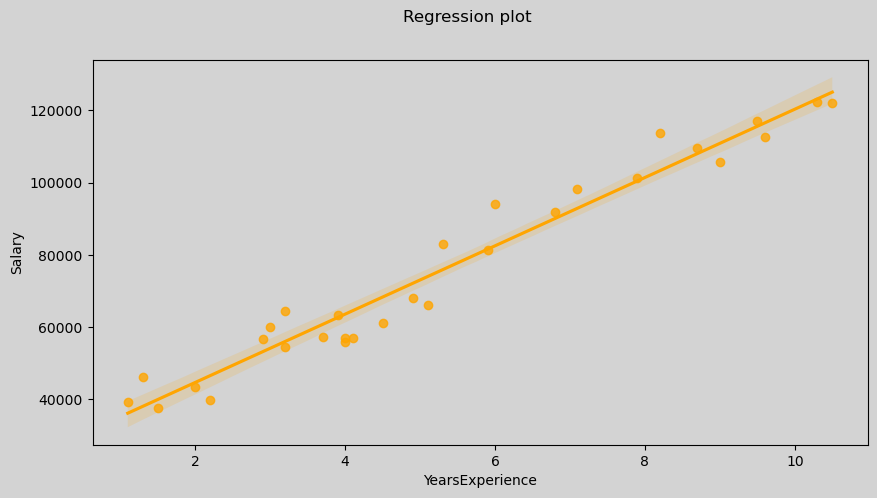

In [43]:
#ploting regression Plot 
plt.figure(figsize=(10,5),facecolor='lightgrey')
axes=plt.axes()
axes.set_facecolor('lightgrey')
plt.suptitle('Regression plot')
sns.regplot(df.YearsExperience,df.Salary,color='orange');
